In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### Подготовка данных

In [2]:
test_data = pd.read_csv('test.csv')

In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [4]:
train_data = pd.read_csv('train.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


### Ищем на графиках ошибочные данные

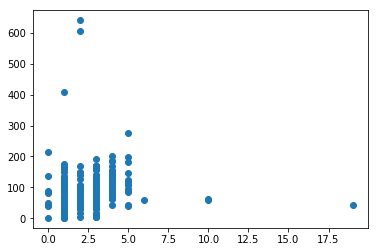

In [6]:
plt.scatter(train_data.Rooms, train_data.Square)

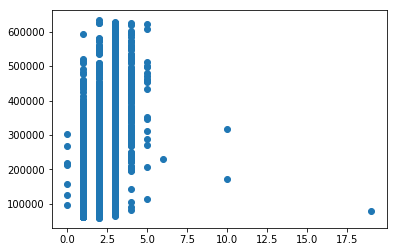

In [7]:
plt.scatter(train_data.Rooms, train_data.Price)

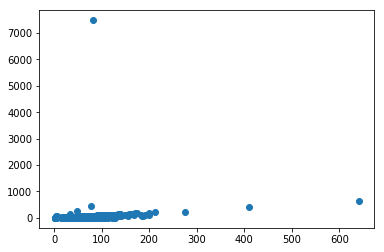

In [8]:
plt.scatter(train_data.Square, train_data.LifeSquare)

In [9]:
# Убираем все экстримальные значения

### Функции для очистки и подготовки данных

In [10]:
mean_year = np.round(train_data.loc[train_data['HouseYear'] <= 2020, 'HouseYear'].mean())
mean_healthcare = np.round(train_data["Healthcare_1"].mean())
mean_square_for_max = train_data.loc[(train_data['Rooms'] <= train_data.loc[(train_data['Square'] > 300), 'Rooms'].mean()), 'Square'].mean()
mean_square_for_big_ls = train_data.loc[train_data['LifeSquare'] > 250, 'Square'].mean()
mean_life_squae_for_max = train_data.loc[train_data['Square'] >= mean_square_for_big_ls, 'LifeSquare'].mean()

In [11]:
def clean_year(df, mean_year):
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = mean_year

In [12]:
def clean_life_square(df, mean_life_squae_for_max):
    df.loc[(df['LifeSquare'] < 5) | (df['LifeSquare'].isnull()), 'LifeSquare'] = df['Square']*0.85
    df.loc[df['LifeSquare'] > 250, 'LifeSquare'] = mean_life_squae_for_max

In [13]:
def clean_square(df, mean_square_for_max):
    df.loc[(df['Square'] > 300), 'Square'] = mean_square_for_max

In [14]:
def clean_healthcare_1(df, mean_healthcare):
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = mean_healthcare

In [15]:
def clean_rooms(df):
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] < 30), 'Rooms'] = 1
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 30) & (df['LifeSquare'] < 45), 'Rooms'] = 2
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 45) & (df['LifeSquare'] < 60), 'Rooms'] = 3
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 60) & (df['LifeSquare'] < 75), 'Rooms'] = 4
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 70), 'Rooms'] = 6
    df.loc[(df['Rooms'] > 10), 'Rooms'] = 2

In [16]:
def prepare_data(df, mean_year=mean_year, mean_healthcare=mean_healthcare, mean_square_for_max=mean_square_for_max, mean_life_squae_for_max=mean_life_squae_for_max):
    clean_year(df, mean_year)
    clean_life_square(df, mean_life_squae_for_max)
    clean_healthcare_1(df, mean_healthcare)
    clean_rooms(df)
    clean_square(df, mean_square_for_max)

In [17]:
prepare_data(train_data)
prepare_data(test_data)

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(9), int64(8), object(3)
memory usage: 1.5+ MB


### Проверяем на графиках что избавились от ошибочных данных

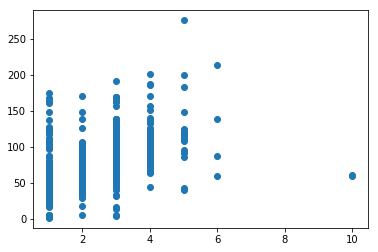

In [19]:
plt.scatter(train_data.Rooms, train_data.Square)

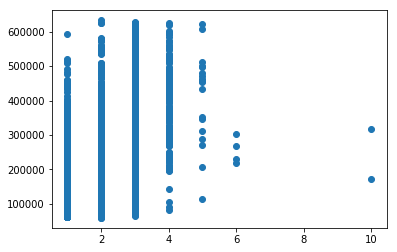

In [20]:
plt.scatter(train_data.Rooms, train_data.Price)

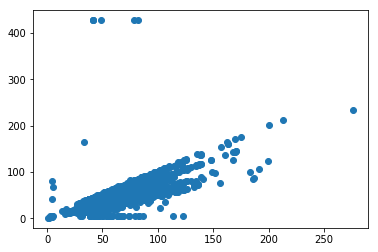

In [21]:
plt.scatter(train_data.Square, train_data.LifeSquare)

### Убираем лишние поля и делим на train и valid

In [22]:
X = pd.get_dummies(train_data)
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtypes: float64(8), int64(7), uint8(6)
memory usage: 1.2 MB


In [23]:
y = train_data.Price
y.count()

10000

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

### Создаем и обучаем модель

In [25]:
model = RandomForestRegressor(n_estimators=1000, max_depth=18, random_state=42, max_features=7)

In [26]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=42, verbose=0, warm_start=False)

In [27]:
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

In [28]:
# Предсказываем на valid и train данных и проверяем метрики

In [29]:
# Для train
r2_score(y_train, y_pred_train)

0.9569322644630279

In [30]:
# Для valid
r2_score(y_valid, y_pred)

0.7363696727011546

In [31]:
model.feature_importances_

array([0.05061447, 0.12438251, 0.27222398, 0.0857151 , 0.0441978 ,
       0.02740377, 0.02557973, 0.03840575, 0.03879221, 0.07319671,
       0.0834275 , 0.06262806, 0.02625612, 0.01728365, 0.02581803,
       0.00038356, 0.00035732, 0.00091163, 0.00088519, 0.000781  ,
       0.00075591])

### Предсказываем цены для тестовых данных и выгружаем в файл

In [32]:
X_test = pd.get_dummies(test_data)
X_test.drop("Id", axis=1, inplace=True)
test_data["Price"] = model.predict(X_test)

In [33]:
test_data.loc[:, ['Id', 'Price']].to_csv('SShirkin_predictions.csv', index=False)